In [1]:
# importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data
hotel_df = pd.read_csv("data/hotel_df.csv")

(5491, 14)


In [15]:
# check df shape and structure
print(hotel_df.shape)
print(hotel_df.info())

(5491, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5491 entries, 0 to 5490
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HTL_CD          5491 non-null   object 
 1   STY_DT          5491 non-null   object 
 2   CURR_CD         5491 non-null   object 
 3   RM_NTS          5491 non-null   int64  
 4   RM_REV_AMT_LOC  5491 non-null   float64
 5   REGION          5491 non-null   object 
 6   COUNTRY         5491 non-null   object 
 7   RMS_AVAIL       5491 non-null   int64  
 8   EXCH_RATE_AMT   5491 non-null   float64
 9   CAL_DOW         5491 non-null   int64  
 10  OCCUPANCY       5491 non-null   float64
 11  ADR             5491 non-null   float64
 12  REV_PAR         5491 non-null   float64
 13  CONVERTED_REV   5491 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 600.7+ KB
None


In [5]:
# df column descriptions
print(hotel_df.describe())

            RM_NTS  RM_REV_AMT_LOC    RMS_AVAIL  EXCH_RATE_AMT      CAL_DOW  \
count  5491.000000    5.491000e+03  5491.000000    5491.000000  5491.000000   
mean    263.603533    2.765036e+05   451.381169      11.467948     3.999636   
std     221.086342    4.877422e+05   282.838801      18.429075     1.996445   
min       4.000000    3.115500e+02    68.000000       0.744791     1.000000   
25%      74.000000    8.071820e+03   335.000000       1.000000     2.000000   
50%     238.000000    6.889050e+04   348.000000       1.000000     4.000000   
75%     346.000000    2.593600e+05   600.000000       6.541252     6.000000   
max     918.000000    3.319752e+06   906.000000      48.068047     7.000000   

         OCCUPANCY          ADR      REV_PAR  CONVERTED_REV  
count  5491.000000  5491.000000  5491.000000   5.491000e+03  
mean     60.256855   976.438783   743.871249   3.861585e+04  
std      29.935809  1683.633590  1407.989629   7.656780e+04  
min       2.388060    37.093457     2.63

In [7]:
# check what hotels are in the dataset
hotel_df.HTL_CD.unique()

array(['EXIUS', 'GCBJN', 'ICWAS', 'PHEGA', 'UKPIL'], dtype=object)

In [28]:
# Add new YEAR / MONTH columns for aggregating purposes
hotel_df['YEAR'] = pd.to_datetime(hotel_df['STY_DT']).dt.year
hotel_df['MONTH'] = pd.to_datetime(hotel_df['STY_DT']).dt.month

In [37]:
# define columns
num_columns = ['RM_REV_AMT_LOC', 'OCCUPANCY', 'ADR','REV_PAR', 'CONVERTED_REV', 'Converted_revenue_to_USD']

# iterate through the columns of the DataFrame
for column in hotel_df.columns:
    # check if the column is in the list of monetary columns
    if column in num_columns:
        # round the values in the column to 2 decimal places
        hotel_df[column] = hotel_df[column].round(2)

In [38]:
# create separate df for each hotel

# hotel codes
hotel_codes = ['EXIUS', 'GCBJN', 'ICWAS', 'PHEGA', 'UKPIL']

# iterate over each hotel code
for hotel_code in hotel_codes:
    # filter the df for each hotel code
    hotel_data = hotel_df[hotel_df['HTL_CD'] == hotel_code]
    
    # define the filename for the CSV file based on the hotel code
    filename = f'data/hotel_{hotel_code}_data.csv'
    
    # Write the filtered DataFrame to a CSV file
    hotel_data.to_csv(filename, index=False)

In [39]:
# read each hotel data csv file

exius_data = pd.read_csv("data/hotel_EXIUS_data.csv")
gcbjn_data = pd.read_csv("data/hotel_GCBJN_data.csv")
icwas_data = pd.read_csv("data/hotel_ICWAS_data.csv")
phega_data = pd.read_csv("data/hotel_PHEGA_data.csv")
ukpil_data = pd.read_csv("data/hotel_UKPIL_data.csv")

In [40]:
exius_data

,HTL_CD,STY_DT,CURR_CD,RM_NTS,RM_REV_AMT_LOC,REGION,COUNTRY,RMS_AVAIL,EXCH_RATE_AMT,CAL_DOW,OCCUPANCY,ADR,REV_PAR,CONVERTED_REV,YEAR,MONTH
0,EXIUS,2019-01-01T00:00:00Z,USD,13,1614.09,AMERICAS,UNITED STATES,68,1.0,3,19.12,124.16,23.74,1614.09,2019,1
1,EXIUS,2019-01-02T00:00:00Z,USD,32,3798.64,AMERICAS,UNITED STATES,68,1.0,4,47.06,118.71,55.86,3798.64,2019,1
2,EXIUS,2019-01-03T00:00:00Z,USD,27,3001.06,AMERICAS,UNITED STATES,68,1.0,5,39.71,111.15,44.13,3001.06,2019,1
3,EXIUS,2019-01-04T00:00:00Z,USD,21,2408.18,AMERICAS,UNITED STATES,68,1.0,6,30.88,114.68,35.41,2408.18,2019,1
4,EXIUS,2019-01-05T00:00:00Z,USD,25,2832.58,AMERICAS,UNITED STATES,68,1.0,7,36.76,113.30,41.66,2832.58,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,EXIUS,2021-12-27T00:00:00Z,USD,46,5342.95,AMERICAS,UNITED STATES,68,1.0,2,67.65,116.15,78.57,5342.95,2021,12
1094,EXIUS,2021-12-28T00:00:00Z,USD,33,3992.78,AMERICAS,UNITED STATES,68,1.0,3,48.53,120.99,58.72,3992.78,2021,12
1095,EXIUS,2021-12-29T00:00:00Z,USD,37,4388.74,AMERICAS,UNITED STATES,68,1.0,4,54.41,118.61,64.54,4388.74,2021,12
1096,EXIUS,2021-12-30T00:00:00Z,USD,35,4116.44,AMERICAS,UNITED STATES,68,1.0,5,51.47,117.61,60.54,4116.44,2021,12


In [41]:
gcbjn_data

,HTL_CD,STY_DT,CURR_CD,RM_NTS,RM_REV_AMT_LOC,REGION,COUNTRY,RMS_AVAIL,EXCH_RATE_AMT,CAL_DOW,OCCUPANCY,ADR,REV_PAR,CONVERTED_REV,YEAR,MONTH
0,GCBJN,2019-01-01T00:00:00Z,CNY,283,128390.15,GREATER CHINA,CHINA-PEOPLES REPUBLIC,600,6.541252,3,47.17,453.68,213.98,19627.76,2019,1
1,GCBJN,2019-01-02T00:00:00Z,CNY,293,149840.91,GREATER CHINA,CHINA-PEOPLES REPUBLIC,600,6.541252,4,48.83,511.40,249.73,22907.07,2019,1
2,GCBJN,2019-01-03T00:00:00Z,CNY,372,196829.18,GREATER CHINA,CHINA-PEOPLES REPUBLIC,600,6.541252,5,62.00,529.11,328.05,30090.44,2019,1
3,GCBJN,2019-01-04T00:00:00Z,CNY,473,260086.82,GREATER CHINA,CHINA-PEOPLES REPUBLIC,600,6.541252,6,78.83,549.87,433.48,39761.02,2019,1
4,GCBJN,2019-01-05T00:00:00Z,CNY,438,244708.67,GREATER CHINA,CHINA-PEOPLES REPUBLIC,600,6.541252,7,73.00,558.70,407.85,37410.07,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,GCBJN,2021-12-27T00:00:00Z,CNY,206,90956.40,GREATER CHINA,CHINA-PEOPLES REPUBLIC,600,6.541252,2,34.33,441.54,151.59,13905.04,2021,12
1094,GCBJN,2021-12-28T00:00:00Z,CNY,241,106691.87,GREATER CHINA,CHINA-PEOPLES REPUBLIC,600,6.541252,3,40.17,442.70,177.82,16310.62,2021,12
1095,GCBJN,2021-12-29T00:00:00Z,CNY,242,108876.21,GREATER CHINA,CHINA-PEOPLES REPUBLIC,600,6.541252,4,40.33,449.90,181.46,16644.55,2021,12
1096,GCBJN,2021-12-30T00:00:00Z,CNY,266,115828.85,GREATER CHINA,CHINA-PEOPLES REPUBLIC,600,6.541252,5,44.33,435.45,193.05,17707.44,2021,12


In [42]:
icwas_data

,HTL_CD,STY_DT,CURR_CD,RM_NTS,RM_REV_AMT_LOC,REGION,COUNTRY,RMS_AVAIL,EXCH_RATE_AMT,CAL_DOW,OCCUPANCY,ADR,REV_PAR,CONVERTED_REV,YEAR,MONTH
0,ICWAS,2019-01-01T00:00:00Z,USD,136,33792.92,AMERICAS,UNITED STATES,335,1.0,3,40.60,248.48,100.87,33792.92,2019,1
1,ICWAS,2019-01-02T00:00:00Z,USD,205,53169.28,AMERICAS,UNITED STATES,335,1.0,4,61.19,259.36,158.71,53169.28,2019,1
2,ICWAS,2019-01-03T00:00:00Z,USD,207,51683.90,AMERICAS,UNITED STATES,335,1.0,5,61.79,249.68,154.28,51683.90,2019,1
3,ICWAS,2019-01-04T00:00:00Z,USD,154,37569.35,AMERICAS,UNITED STATES,335,1.0,6,45.97,243.96,112.15,37569.35,2019,1
4,ICWAS,2019-01-05T00:00:00Z,USD,137,32723.77,AMERICAS,UNITED STATES,335,1.0,7,40.90,238.86,97.68,32723.77,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,ICWAS,2021-12-27T00:00:00Z,USD,151,50578.93,AMERICAS,UNITED STATES,335,1.0,2,45.07,334.96,150.98,50578.93,2021,12
1094,ICWAS,2021-12-28T00:00:00Z,USD,171,60110.47,AMERICAS,UNITED STATES,335,1.0,3,51.04,351.52,179.43,60110.47,2021,12
1095,ICWAS,2021-12-29T00:00:00Z,USD,167,57753.91,AMERICAS,UNITED STATES,335,1.0,4,49.85,345.83,172.40,57753.91,2021,12
1096,ICWAS,2021-12-30T00:00:00Z,USD,99,43369.69,AMERICAS,UNITED STATES,335,1.0,5,29.55,438.08,129.46,43369.69,2021,12


In [43]:
phega_data

,HTL_CD,STY_DT,CURR_CD,RM_NTS,RM_REV_AMT_LOC,REGION,COUNTRY,RMS_AVAIL,EXCH_RATE_AMT,CAL_DOW,OCCUPANCY,ADR,REV_PAR,CONVERTED_REV,YEAR,MONTH
0,PHEGA,2019-01-01T00:00:00Z,PHP,196,1175982.03,"EUROPE, MIDDLE EAST, ASIA & AFRICA",PHILIPPINES,348,48.068047,3,56.32,5999.91,3379.26,24464.94,2019,1
1,PHEGA,2019-01-02T00:00:00Z,PHP,168,967607.07,"EUROPE, MIDDLE EAST, ASIA & AFRICA",PHILIPPINES,348,48.068047,4,48.28,5759.57,2780.48,20129.94,2019,1
2,PHEGA,2019-01-03T00:00:00Z,PHP,167,942676.74,"EUROPE, MIDDLE EAST, ASIA & AFRICA",PHILIPPINES,348,48.068047,5,47.99,5644.77,2708.84,19611.30,2019,1
3,PHEGA,2019-01-04T00:00:00Z,PHP,158,831695.84,"EUROPE, MIDDLE EAST, ASIA & AFRICA",PHILIPPINES,348,48.068047,6,45.40,5263.90,2389.93,17302.47,2019,1
4,PHEGA,2019-01-05T00:00:00Z,PHP,191,948210.42,"EUROPE, MIDDLE EAST, ASIA & AFRICA",PHILIPPINES,348,48.068047,7,54.89,4964.45,2724.74,19726.42,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,PHEGA,2021-12-27T00:00:00Z,PHP,281,776252.87,"EUROPE, MIDDLE EAST, ASIA & AFRICA",PHILIPPINES,348,48.068047,2,80.75,2762.47,2230.61,16149.04,2021,12
1095,PHEGA,2021-12-28T00:00:00Z,PHP,308,835530.44,"EUROPE, MIDDLE EAST, ASIA & AFRICA",PHILIPPINES,348,48.068047,3,88.51,2712.76,2400.95,17382.24,2021,12
1096,PHEGA,2021-12-29T00:00:00Z,PHP,311,875963.99,"EUROPE, MIDDLE EAST, ASIA & AFRICA",PHILIPPINES,348,48.068047,4,89.37,2816.60,2517.14,18223.42,2021,12
1097,PHEGA,2021-12-30T00:00:00Z,PHP,309,927796.13,"EUROPE, MIDDLE EAST, ASIA & AFRICA",PHILIPPINES,348,48.068047,5,88.79,3002.58,2666.08,19301.72,2021,12


In [44]:
ukpil_data

,HTL_CD,STY_DT,CURR_CD,RM_NTS,RM_REV_AMT_LOC,REGION,COUNTRY,RMS_AVAIL,EXCH_RATE_AMT,CAL_DOW,OCCUPANCY,ADR,REV_PAR,CONVERTED_REV,YEAR,MONTH
0,UKPIL,2019-01-01T00:00:00Z,GBP,853,95246.41,"EUROPE, MIDDLE EAST, ASIA & AFRICA",UNITED KINGDOM,906,0.744791,3,94.15,111.66,105.13,127883.40,2019,1
1,UKPIL,2019-01-02T00:00:00Z,GBP,900,91036.51,"EUROPE, MIDDLE EAST, ASIA & AFRICA",UNITED KINGDOM,906,0.744791,4,99.34,101.15,100.48,122230.95,2019,1
2,UKPIL,2019-01-03T00:00:00Z,GBP,841,83663.87,"EUROPE, MIDDLE EAST, ASIA & AFRICA",UNITED KINGDOM,906,0.744791,5,92.83,99.48,92.34,112332.01,2019,1
3,UKPIL,2019-01-04T00:00:00Z,GBP,677,67525.91,"EUROPE, MIDDLE EAST, ASIA & AFRICA",UNITED KINGDOM,906,0.744791,6,74.72,99.74,74.53,90664.24,2019,1
4,UKPIL,2019-01-05T00:00:00Z,GBP,697,70125.75,"EUROPE, MIDDLE EAST, ASIA & AFRICA",UNITED KINGDOM,906,0.744791,7,76.93,100.61,77.40,94154.94,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,UKPIL,2021-12-27T00:00:00Z,GBP,408,33655.82,"EUROPE, MIDDLE EAST, ASIA & AFRICA",UNITED KINGDOM,906,0.744791,2,45.03,82.49,37.15,45188.27,2021,12
1094,UKPIL,2021-12-28T00:00:00Z,GBP,433,36379.99,"EUROPE, MIDDLE EAST, ASIA & AFRICA",UNITED KINGDOM,906,0.744791,3,47.79,84.02,40.15,48845.91,2021,12
1095,UKPIL,2021-12-29T00:00:00Z,GBP,439,36752.02,"EUROPE, MIDDLE EAST, ASIA & AFRICA",UNITED KINGDOM,906,0.744791,4,48.45,83.72,40.57,49345.41,2021,12
1096,UKPIL,2021-12-30T00:00:00Z,GBP,425,35784.39,"EUROPE, MIDDLE EAST, ASIA & AFRICA",UNITED KINGDOM,906,0.744791,5,46.91,84.20,39.50,48046.22,2021,12


In [50]:
yearly_revenue = exius_data.groupby('YEAR')['CONVERTED_REV'].sum().reset_index(name='CONVERTED_REV')

print(yearly_revenue)

   YEAR  CONVERTED_REV
0  2019     2091263.10
1  2020     1231759.41
2  2021     1821386.54


In [58]:
monthly_avg_occupancy = exius_data.groupby(['YEAR', 'MONTH'])['OCCUPANCY'].mean().reset_index(name='OCCUPANCY')

monthly_avg_occupancy['YEAR_MONTH'] = monthly_avg_occupancy['YEAR'].astype(str) + "-" + monthly_avg_occupancy['MONTH'].astype(str)

monthly_avg_occupancy

,YEAR,MONTH,OCCUPANCY,YEAR_MONTH
0,2019,1,58.680645,2019-1
1,2019,2,58.560357,2019-2
2,2019,3,72.580000,2019-3
3,2019,4,79.964687,2019-4
4,2019,5,72.627742,2019-5
5,2019,6,72.941333,2019-6
6,2019,7,65.844839,2019-7
7,2019,8,60.388710,2019-8
8,2019,9,66.763667,2019-9
9,2019,10,86.148065,2019-10


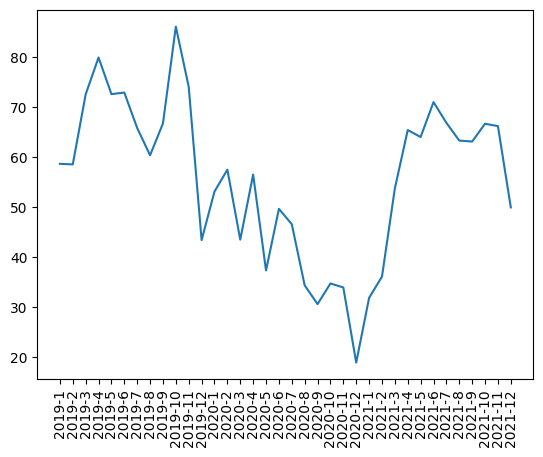

In [70]:
# monthly average occupancy rate

plt.plot(monthly_avg_occupancy['YEAR_MONTH'], monthly_avg_occupancy['OCCUPANCY'])
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees
plt.show()

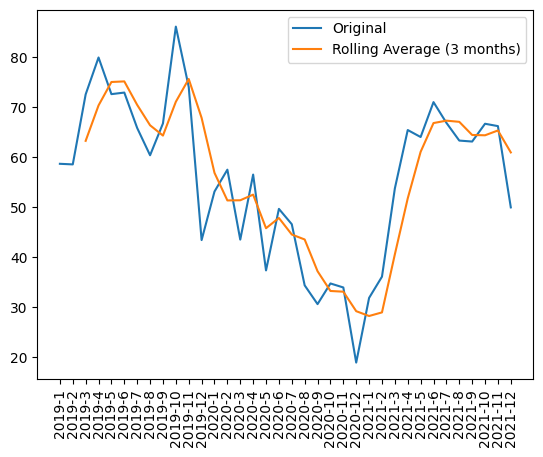

In [68]:
# Calculate the rolling average with a window size of 3 months
rolling_avg = monthly_avg_occupancy['OCCUPANCY'].rolling(window=3).mean()

# Plot the original occupancy data and the rolling average
plt.plot(monthly_avg_occupancy['YEAR_MONTH'], monthly_avg_occupancy['OCCUPANCY'], label='Original')
plt.plot(monthly_avg_occupancy['YEAR_MONTH'], rolling_avg, label='Rolling Average (3 months)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

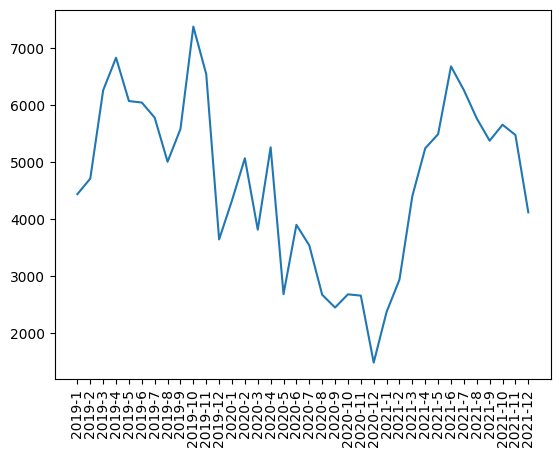

In [69]:
monthly_avg_rev = exius_data.groupby(['YEAR', 'MONTH'])['CONVERTED_REV'].mean().reset_index(name='CONVERTED_REV')

monthly_avg_rev['YEAR_MONTH'] = monthly_avg_rev['YEAR'].astype(str) + "-" + monthly_avg_rev['MONTH'].astype(str)

monthly_avg_rev

plt.plot(monthly_avg_rev['YEAR_MONTH'], monthly_avg_rev['CONVERTED_REV'])
plt.xticks(rotation=90)
plt.show()